##### This code aims to solely calculate the average, max, and min range of price change in GBPUSD for the past 5 years, and plot these changes.

In [30]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
gbpusd=yf.Ticker("GBPUSD=X")
data=gbpusd.history(start="2020-01-01", end="2025-01-01")
data=data.reset_index()
data=pd.DataFrame(data)
new_data=data.drop(["Open","Close","Volume","Dividends","Stock Splits"],axis=1)
print(new_data)


                          Date      High       Low
0    2020-01-01 00:00:00+00:00  1.327100  1.321877
1    2020-01-02 00:00:00+00:00  1.326788  1.312508
2    2020-01-03 00:00:00+00:00  1.316119  1.305483
3    2020-01-06 00:00:00+00:00  1.317400  1.306540
4    2020-01-07 00:00:00+00:00  1.321213  1.309638
...                        ...       ...       ...
1300 2024-12-25 00:00:00+00:00  1.281306  1.241000
1301 2024-12-26 00:00:00+00:00  1.255000  1.250266
1302 2024-12-27 00:00:00+00:00  1.259145  1.250672
1303 2024-12-30 00:00:00+00:00  1.260748  1.250813
1304 2024-12-31 00:00:00+00:00  1.256818  1.251486

[1305 rows x 3 columns]


In [32]:
high=new_data["High"]
low=new_data["Low"]
high=np.array(high)
low=np.array(low)
range_=high-low
avg_range=(range_.mean()*10000).round(2)
max_range=(range_.max()*10000).round(2)
min_range=(range_.min()*10000).round(2)
print(f"average range is {avg_range} pips")
print(f"max range is {max_range} pips")
print(f"min range is {min_range} pips")

average range is 94.77 pips
max range is 536.56 pips
min range is 21.46 pips


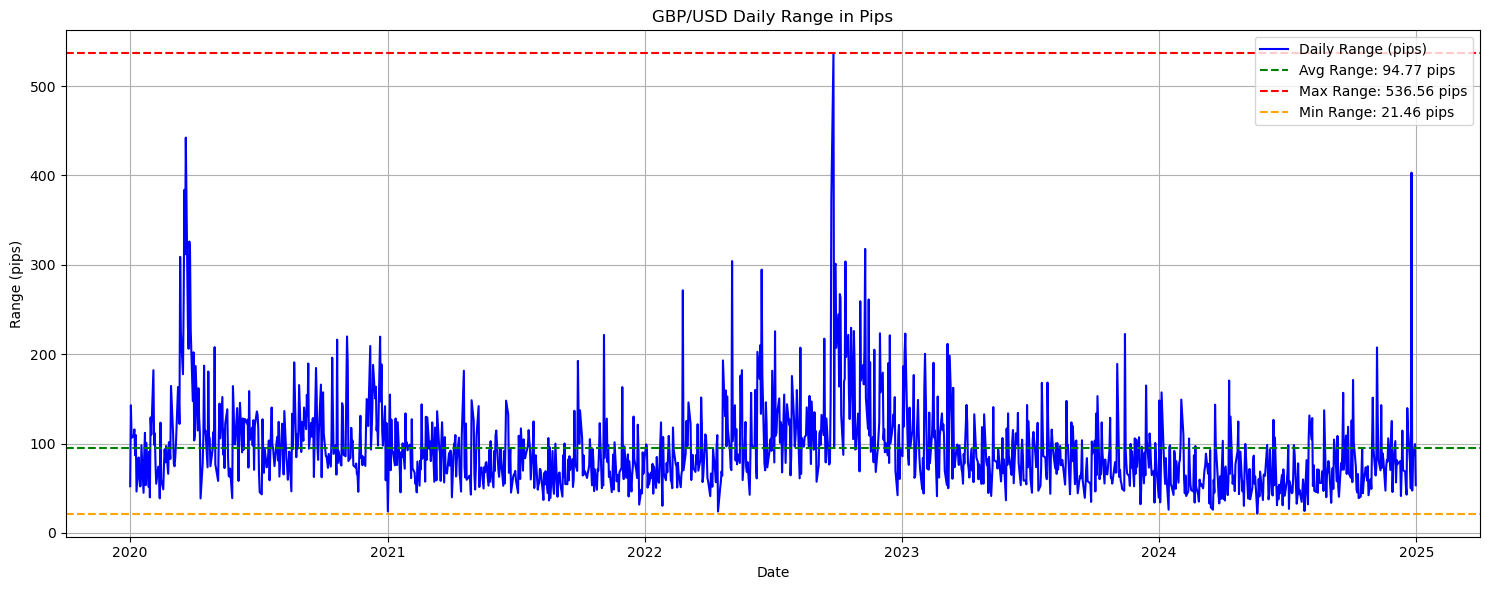

In [33]:
new_data['Range'] = new_data['High'] - new_data['Low']
new_data['Range_pips'] = new_data['Range'] * 10000  # Convert to pips

# Plot the daily range
plt.figure(figsize=(15, 6))
plt.plot(new_data['Date'], new_data['Range_pips'], label='Daily Range (pips)', color='blue')

# Plot horizontal lines for avg, max, and min ranges
plt.axhline(avg_range, color='green', linestyle='--', label=f'Avg Range: {avg_range} pips')
plt.axhline(max_range, color='red', linestyle='--', label=f'Max Range: {max_range} pips')
plt.axhline(min_range, color='orange', linestyle='--', label=f'Min Range: {min_range} pips')

# Formatting
plt.title('GBP/USD Daily Range in Pips')
plt.xlabel('Date')
plt.ylabel('Range (pips)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()